# Block 1

In [2]:
import pandas as pd
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)

y = diabetes.target

# Block 2
Import other necessary libraries

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Block 3
Create a function that:
 
    A. Takes X and y as in the input

    B. Split the X and y into train and test using train_test_split from sklearn

    C. Fit a linear regression model to the training X and training y data

    D. Get the predicted y data for X test from the model

    E. Output (at least) the model fit (i.e., R^2 score = coefficient of determination)

In [125]:
def data_model(X, y):
  """
  a function that splits your data into training and testing data, fits a linear regression model to it, 
  finds the predicted y-values, and calculates the R^2 values
  """

  # Split the data into training and testing data
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

  # Fit a linear regression model to the training X and training y data
  model = LinearRegression()
  model.fit(X_train, y_train)

  # Get the predicted y data for X test from the model
  y_model = model.predict(X_test)

  # Find the R^2 values
  train_r_sq = model.score(X_train, y_train)
  test_r_sq = model.score(X_test, y_test)

  # Output the training and testing R^2 values
  print("Training R^2", train_r_sq)
  print("Testing R^2", test_r_sq)

# Block 4
Show that this function works

In [126]:
# Try the function using the bmi variable
data_model(X[["bmi"]], y)

Training R^2 0.38880250430560737
Testing R^2 0.17466209865339177


# Block 5

Find the best single feature (i.e., column) in X that best predicts y

In [127]:
# Calculate the R^2 scores for each variable and find the highest
for i in X.columns:
  print(i)
  data_model(X[[i]], y)
  print()

age
Training R^2 0.045384727639879774
Testing R^2 -0.011092244658333694

sex
Training R^2 0.0017198871797380333
Testing R^2 -0.004657205501040096

bmi
Training R^2 0.38880250430560737
Testing R^2 0.17466209865339177

bp
Training R^2 0.1964839686305333
Testing R^2 0.18390082705313726

s1
Training R^2 0.04168667199614595
Testing R^2 0.05003179316202577

s2
Training R^2 0.02470761499669738
Testing R^2 0.04248875852908429

s3
Training R^2 0.17017321772012173
Testing R^2 0.09411124480311595

s4
Training R^2 0.19338632561329683
Testing R^2 0.15094928794177753

s5
Training R^2 0.32597994540659747
Testing R^2 0.29630801377437443

s6
Training R^2 0.15228926762626183
Testing R^2 0.12046966383556679



We can see that the variable "s5" (log of serum triglycerides level) best predicts y with a testing R^2 of 0.2963

# Block 6
Using object oriented programming, make a figure that has two subplots. On the left, put the training data as a scatterplot (x,y). On the right, the testing data as a scatterplot (x,y). Include the best fitting model line in both plots and include the R^2 value in both plots for the different fits.

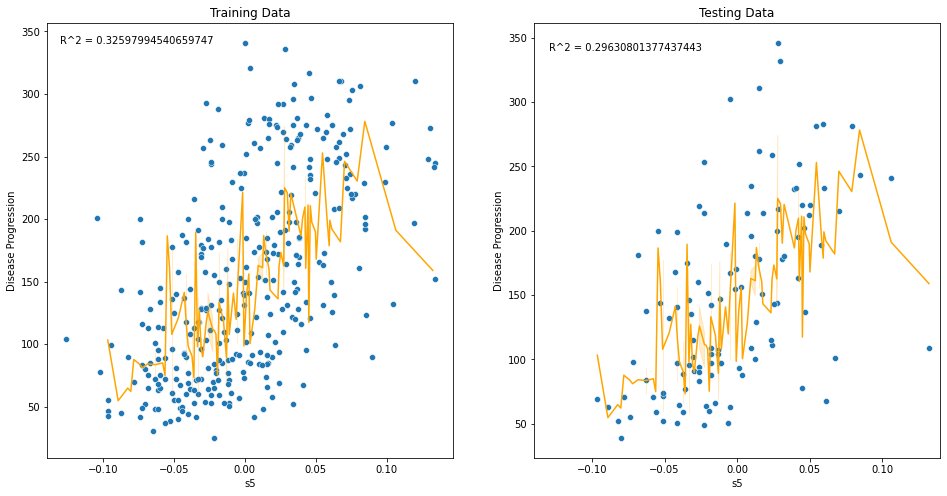

In [170]:
# Set figure axes and size
fig, axes = plt.subplots(1, 2, figsize = [16, 8])

# Fit the model and get predicted y values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)
model = LinearRegression()
model.fit(X_train, y_train)
y_model = model.predict(X_test)

# Scatterplot of training data
sns.scatterplot(x = X_train["s5"],y = y_train, ax = axes[0])
sns.lineplot(x = X_test["s5"], y = y_model, color="orange", ax = axes[0])
axes[0].annotate("R^2 = 0.32597994540659747", xy = [-.13, 340])
axes[0].set_title("Training Data")
axes[0].set_ylabel("Disease Progression")
plt.xlim([-.14,.14])

# Scatterplot of testing data
sns.scatterplot(x = X_test["s5"], y = y_test, ax = axes[1])
sns.lineplot(x = X_test["s5"], y = y_model, color="orange", ax = axes[1])
axes[1].annotate("R^2 = 0.29630801377437443", xy = [-.13, 340])
axes[1].set_title("Testing Data")
axes[1].set_ylabel("Disease Progression")
plt.xlim([-.14,.14])

plt.show()